In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('/home/wings/Downloads/homogeneous-150/hypothesis', header=None, delimiter=' ')

In [3]:
%%time

X_dist = []
Y_signal = []

for i in range(len(data)):
    x_t = data.iat[i, 0]
    y_t = data.iat[i, 1]
    x_s = data.iat[i, 2]
    y_s = data.iat[i, 3]
    dist = math.sqrt((x_t-x_s)**2 + (y_t-y_s)**2)
    if dist in X_dist:
        continue
    signal = data.iloc[i, 4]
    X_dist.append(dist)
    Y_signal.append(signal)

CPU times: user 20.4 s, sys: 0 ns, total: 20.4 s
Wall time: 20.4 s


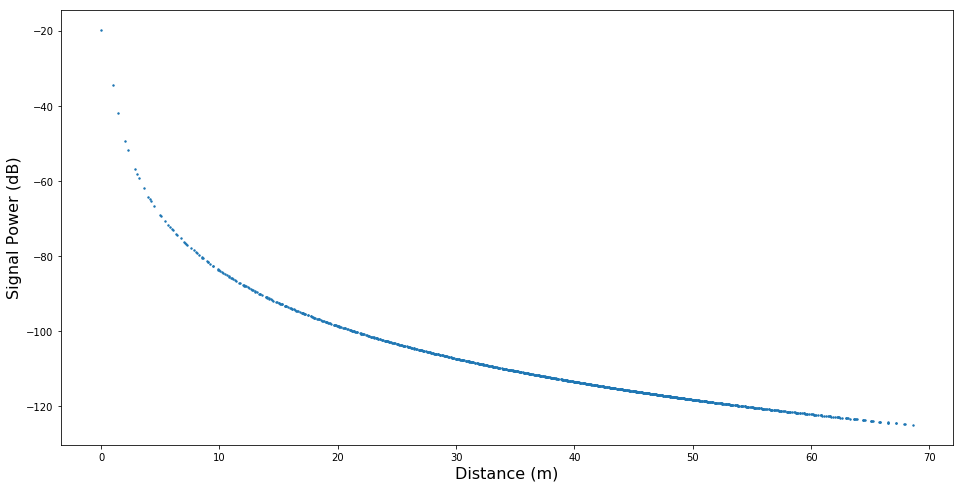

In [4]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

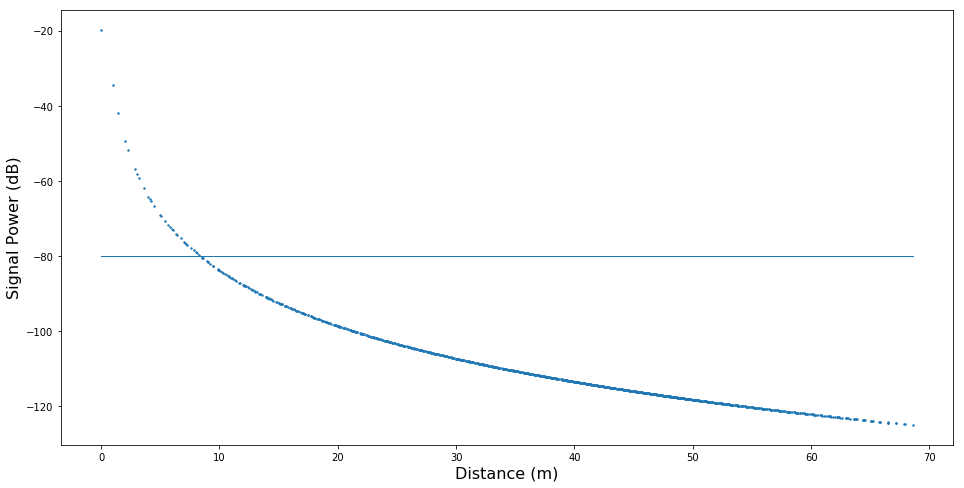

In [5]:
Y_80 = [-80] * len(X_dist)

plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.plot(X_dist, Y_80, linewidth=1)

plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [19]:
def amplitude_2_db_(abso):
    '''Transform the decibal signal strength into absolute value of iq samples
       y = 20*log10(x)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return 20*np.log10(abso)


def db_2_amplitude_(db):
    '''Transform the decibal signal strength into absolute value of iq samples
       x = 10^(y/20)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return np.power(10, np.array(db)/20)

In [62]:
def db(distance):
    return -34.56273667778001 - 49.274881540394276 * np.log10(distance)

In [68]:
def delta(R):
    small = math.sqrt(2)/2 * R
    large = (2-math.sqrt(2)/2) * R
    
    sig_small = db(small)
    sig_large = db(large)
    
    #sig_small = []
    #sig_large = []
    #for dist, sig in zip(X_dist, Y_signal):
        #if dist > math.floor(small) and dist < math.ceil(small):
        #    sig_small.append(sig)
        #if dist > math.floor(large) and dist < math.ceil(large):
        #    sig_large.append(sig)
    
    #sig_small = np.mean(sig_small)
    #sig_large = np.mean(sig_large)
    
    new = amplitude_2_db_(db_2_amplitude_(sig_small) + db_2_amplitude_(sig_large)) 
    delta = new - sig_small
    print(R, sig_small, sig_large, new, delta)
    return delta

1 -27.14612798955597 -40.05997341529285 -25.375583710351584 1.7705442792043868
2 -41.97934536600405 -54.89319079174093 -40.20880108679967 1.7705442792043797
3 -50.656221296271625 -63.5700667220085 -48.88567701706724 1.7705442792043868
4 -56.81256274245212 -69.72640816818901 -55.04201846324774 1.7705442792043797
5 -61.58779215350217 -74.50163757923906 -59.81724787429778 1.770544279204394
6 -65.4894386727197 -78.40328409845658 -63.71889439351531 1.7705442792043868
7 -68.78823380127787 -81.70207922701474 -67.01768952207348 1.7705442792043868
8 -71.6457801189002 -84.55962554463707 -69.87523583969582 1.7705442792043868
9 -74.16631460298728 -87.08016002872415 -72.3957703237829 1.7705442792043868
10 -76.42100952995025 -89.33485495568712 -74.65046525074587 1.7705442792043868
11 -78.46062918776062 -91.37447461349751 -76.69008490855623 1.7705442792043868
12 -80.32265604916778 -93.23650147490466 -78.55211176996337 1.770544279204401
13 -82.03555471718505 -94.94940014292192 -80.26501043798066 1.770

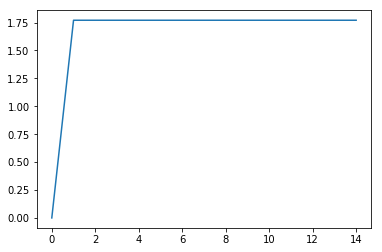

In [76]:
X = [0]
Y = [0]
for i in range(1, 15):
    X.append(i)
    Y.append(delta(i))
    
plt.plot(X, Y)

In [71]:
X

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [55]:
array = np.array(X_dist)

In [57]:
array = array[array<15]
array = array[array>4]

In [60]:
array.sort()

In [61]:
array

array([ 4.12310563,  4.24264069,  4.47213595,  5.        ,  5.09901951,
        5.38516481,  5.65685425,  5.83095189,  6.        ,  6.08276253,
        6.32455532,  6.40312424,  6.70820393,  7.        ,  7.07106781,
        7.21110255,  7.28010989,  7.61577311,  7.81024968,  8.        ,
        8.06225775,  8.24621125,  8.48528137,  8.54400375,  8.60232527,
        8.94427191,  9.        ,  9.05538514,  9.21954446,  9.43398113,
        9.48683298,  9.8488578 ,  9.89949494, 10.        , 10.04987562,
       10.19803903, 10.29563014, 10.44030651, 10.63014581, 10.77032961,
       10.81665383, 11.        , 11.04536102, 11.18033989, 11.3137085 ,
       11.40175425, 11.66190379, 11.70469991, 12.        , 12.04159458,
       12.08304597, 12.16552506, 12.20655562, 12.36931688, 12.52996409,
       12.64911064, 12.72792206, 12.80624847, 13.        , 13.03840481,
       13.15294644, 13.34166406, 13.41640786, 13.45362405, 13.60147051,
       13.89244399, 13.92838828, 14.        , 14.03566885, 14.14

In [17]:
sig_small

-70.9891943423509

In [18]:
sig_large

-84.78724855973614

In [7]:
small, large

(5.656854249492381, 10.34314575050762)

In [9]:
math.floor(5.5), math.ceil(5.5)

(5, 6)

In [24]:
math.sqrt(2)/2 * 8.3

5.868986283848345

In [23]:
(2-math.sqrt(2)/2) * 8.3

10.731013716151656

In [30]:
for dist, sig in zip(X_dist, Y_signal):
    if sig>=-91 and sig <= -90:
        print(dist, sig)

13.416407864998739 -90.12687944291687
13.92838827718412 -90.92831629289057
13.601470508735444 -90.42004585217478
13.341664064126334 -90.00732619273235
13.892443989449804 -90.87301950535027
13.45362404707371 -90.18615884426269


In [77]:
Y_signal.sort()

In [79]:
Y_signal[-5:]

[-51.783568759753116,
 -49.395954054228106,
 -41.97934536600405,
 -34.562736677780016,
 -19.729519301331923]

/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


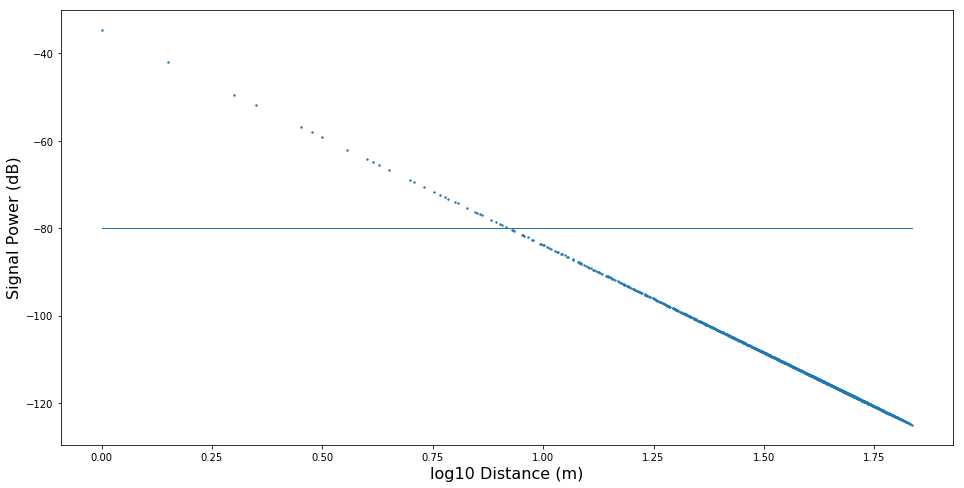

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.log10(X_dist), Y_signal, s=2)
plt.plot(np.log10(X_dist), Y_80, linewidth=1)
plt.xlabel('log10 Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()